In [2]:

import matplotlib as plt #for graphs
import pandas as pd #for data representation

import tensorflow as tf #library in python

from utils import * #Python Utils is a collection of small Python functions and classes which make common patterns shorter and easier
#for ex, it will provide enum in python
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

#keras is used as a high level interface for tensorflow library
%matplotlib inline

tf.logging.set_verbosity(tf.logging.ERROR)

print("Library imported")

/home/anubhav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/anubhav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/anubhav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/anubhav/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

Library imported


In [3]:
df=pd.read_csv('data.csv',names = column_names) #df=data frame,data structure provide by pandas to store this data
#here column name we have defined in utils.py file 
df.head() #this give top five rows of data

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [4]:
df.isna().sum() #this is used to check if any data colm is missing isna fxn,and sum gives total number of missing

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [5]:
#we have to first normalize the data before performance
df=df.iloc[:,1:] #here we are chossing all rows and all coumn expect first colum becos it is serial numbers
df_norm=(df - df.mean())/df.std() #here we normailize by column with subtracting with mean and then divide by standard deviation
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [6]:
#here we have to make label fxn to convert back the price from normal to actual for outputting the value
y_mean=df['price'].mean() #mean of actual data not normalized data
y_std=df['price'].std() #std of actual data not normalized data

def convert_label_value(pred): #fxn to convert
    return int(pred*y_std +y_mean)



In [7]:
x=df_norm.iloc[:,:6] #separating the data to train  
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [8]:
y=df_norm.iloc[:,-1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [9]:
x_arr=x.values
y_arr=y.values

#coverting data into array for training and testing data sets

print("feature array shape",x_arr.shape)
print("label array shape",y_arr.shape)

feature array shape (5000, 6)
label array shape (5000,)


In [10]:
x_train,x_test,y_train,y_test=train_test_split(x_arr,y_arr,test_size=0.05,random_state=0)

#If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

#However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets

print("Trainig set",x_train.shape,y_train.shape)
print("Test set",x_test.shape,y_test.shape)


Trainig set (4750, 6) (4750,)
Test set (250, 6) (250,)


In [11]:
#Here we train our model using neural networks

def get_model():
    model=Sequential([     #Sequential fxn of keras A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
 #means if model has one input and one output
        
 #The Rectified Linear Unit(relu) is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back
 #dense means every layer is connected with another layer       
        Dense(10,input_shape=(6,),activation='relu'),
        Dense(20,activation='relu'),
        Dense(5,activation='relu'),
        Dense(1)
    ])
    
    # we have to compile the model
    model.compile(
        loss='mse', #loss fxn is mse(mean squared error)
        optimizer='adam' #optimizer (gradient descent type)
    )
    
    return model

get_model().summary()

#here param is calcualted by for ex 105 => 20*5 +5  each 20 nodes has line with 5 nodes + and 1 intercept has five lines so 105


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [14]:
#earlystopping is a fxn to stop if there is not any significant change in loss value ,here we are depiciting
#loss over validation loss and patience indicate that it will keep patience for 5 times before stopping  
es_cb=EarlyStopping(monitor='val_loss',patience=5) #es_cb is earlystopping callback



model=get_model() # this model we will use

preds_on_untrained=model.predict(x_test) #prediction will take place via the inital conditions

#we fit the data,history variable is used to store the history
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=[es_cb]) #epochs 100 i.e. we will run for max. 100 times



Train on 4750 samples, validate on 250 samples
Epoch 1/100
4750/4750 [==============================] - 0s 78us/sample - loss: 0.5959 - val_loss: 0.2913
Epoch 2/100
4750/4750 [==============================] - 0s 39us/sample - loss: 0.2573 - val_loss: 0.2040
Epoch 3/100
4750/4750 [==============================] - 0s 39us/sample - loss: 0.1974 - val_loss: 0.1768
Epoch 4/100
4750/4750 [==============================] - 0s 39us/sample - loss: 0.1791 - val_loss: 0.1665
Epoch 5/100
4750/4750 [==============================] - 0s 41us/sample - loss: 0.1716 - val_loss: 0.1649
Epoch 6/100
4750/4750 [==============================] - 0s 39us/sample - loss: 0.1680 - val_loss: 0.1651
Epoch 7/100
4750/4750 [==============================] - 0s 37us/sample - loss: 0.1652 - val_loss: 0.1598
Epoch 8/100
4750/4750 [==============================] - ETA: 0s - loss: 0.162 - 0s 38us/sample - loss: 0.1627 - val_loss: 0.1583
Epoch 9/100
4750/4750 [==============================] - 0s 38us/sample - loss: 0

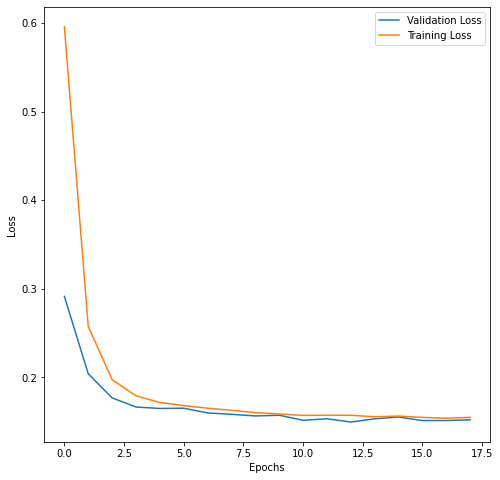

In [15]:
#this fxn help us look in losses of trainig and validation
plot_loss(history)

/home/anubhav/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


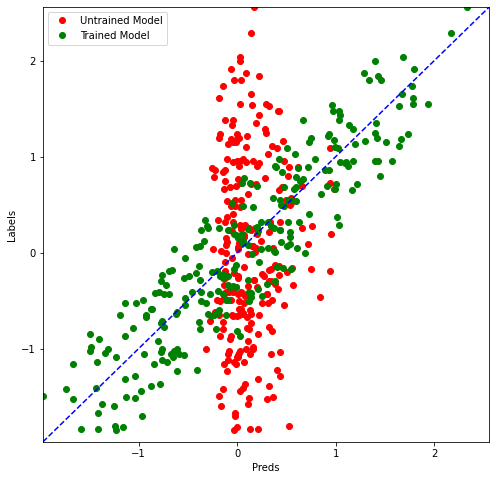

In [18]:
#prediction on basis of final conditons
preds_on_trained=model.predict(x_test)

compare_predictions(preds_on_untrained,preds_on_trained,y_test)

#Here the graph has range from -2 to 2 because this is normalized data 

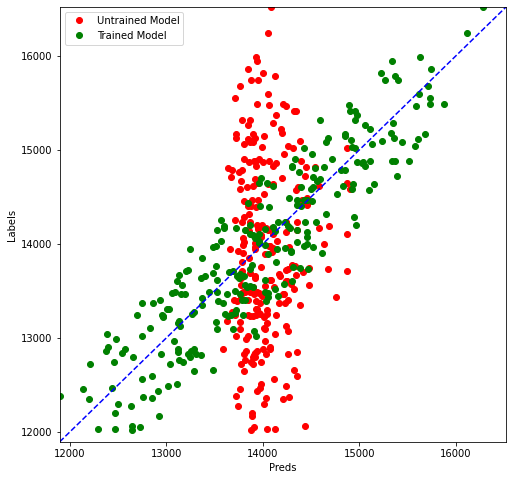

In [20]:
#now for actual data

price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained = [convert_label_value(y) for y in preds_on_trained]

price_test=[convert_label_value(y) for y in y_test]

compare_predictions(price_untrained,price_trained,price_test)
 